<a href="https://colab.research.google.com/github/cristianomg10/uniasselvi-projeto-ii/blob/etapa-2/Projeto_II_Futuro_dos_Dados_e_Aplica%C3%A7%C3%A3o_de_Big_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto II - Futuro dos Dados e Aplicação de Big Data

**Estudante:** Cristiano M. Garcia (2874011)

**Curso:** Big Data e Inteligência Analítica

## Introdução e Fundamentação Teórica

>### Definição do Tema

A Análise de Sentimentos é uma atividade primordial para instituições que queiram acompanhar e entender melhor a opinião de seus clientes sobre produtos ou serviços oferecidos.

A Análise de Sentimentos permite o entendimento de emoções de clientes, suas necessidades, podendo gerar informações para melhoridas de produtos e de experiência do cliente com os serviços prestados (ou consumidos).



>### Objetivo

O objetivo deste projeto é a geração de um modelo de classificação de estrelas do conjunto de dados do **Yelp Dataset**. Em outras palavras, a ideia é gerar um classificador que seja capaz de, a partir de um *review* de usuário e outras características, categorizar o texto em uma das 5 categorias disponíveis, que correspondem a **número de estrelas, variando de 1 a 5**.

>### Especificação Técnica

>#### Conjunto de dados

O conjunto de dados foi obtido do site https://www.yelp.com/dataset. O conjunto de dados possui quase 7 milhões de *reviews*, proveniente de mais de 150 mil negócios nos EUA.

Este conjunto de dados possui diversas colunas, entre elas: 
* ***Review***, correspondendo à postagem;
* **Data do *review***, correspondendo à data de postagem no formato aaaa-mm-dd;
* **Número de estrelas**, variando de 1 a 5;
* **ID do negócio** correspondente ao *review*;
* **Estado** de localização do negócio, correspondendo aos estados dos EUA.

Como hipótese inicial, têm-se que o campos **review, data e número de estrelas** podem ser úteis. O review é o que será classificado, a data pode ajudar pois o padrão de escrita é modificado ao longo do tempo de forma não-intencional pelas pessoas, enquanto o número de estrelas será a categoria (classe). 

>#### Métricas

Os dados, considerando as classes, está desbalanceado, o que torna necessária a aplicação de métricas para considerar o desbalanceamento. Sendo assim, as métricas a serem utilizadas são as métricas:

* Acurácia; 
* F1-Score;
* Cohen's Kappa, que mede o índice de concordância entre 2 avaliadores (número real de estrelas, e o número de estrelas predito pelo classificador).

>#### Classificadores

Considerando a quantidade de dados disponíveis nesse conjunto de dados, uma extração de características utilizando **Bag-of-Words** pode gerar dados muito esparsos e de alta dimensionalidade (característica natural de representação de textos). Dessa forma, é pretendido usar 2 classificadores: 

* Support Vector Machine (SVM), com Bag-of-Words. SVM é conhecido por sua habilidade de lidar bem com dados de alta dimensionalidade;
* Redes Neurais Artificiais, com Embeddings e usando LSTM.

>#### Pré-processamento

Como métodos de pré-processamento, será usado stemming. Para o SVM, serão removidas as stopwords.

>#### Bibliotecas

Pretende-se usar neste projeto as bibliotecas Sci-kit Learn e Keras.


>### Metodologia

A metodologia seguirá os seguintes passos, conforme alguns pontos já mencionados acima:

* Pré-processamento;
* Treinamento dos modelos;
* Avaliação seguindo os critérios definidos.

Para o SVM, será utilizado:
* Transformação para minúsculo;
* Remoção de stopwords e pontuação;
* Stemming;
* Uso de bag-of-words.

Para a Rede Neural, será utilizado:
* Transformação para minúsculo.

A remoção de stopwords não favorece os embeddings pois os embeddings são gerados a partir das palavras e associações com suas respectivas palavras vizinhas.


## Carregamento do Dataset e Bibliotecas

Foram carregados apenas 100k registros devido a limitações de memória.

In [ ]:
!unzip /content/drive/MyDrive/Datasets/yelp_review_own.zip

Archive:  /content/drive/MyDrive/Datasets/yelp_review_own.zip
  inflating: saida.csv               


In [ ]:
import pandas as pd

df = pd.read_csv("saida.csv").sample(100000).sort_index()
df.head()

,year_review,stars,text,useful,state
33,2005,4.0,Delicious deep dish Chicago-styled pizza. The ...,0,AZ
35,2005,5.0,British tea time! The perfect place for us gir...,1,AZ
79,2005,1.0,I once went to this Gavi and it was fine. Sec...,0,AZ
120,2005,4.0,"Delicious sandwiches, great pizzas, decent sid...",0,MO
214,2005,3.0,Soooooooo much better than Jamba. I heart the...,0,NV


## Análise dos dados

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 118 to 6990189
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   year_review  100000 non-null  int64  
 1   stars        100000 non-null  float64
 2   text         100000 non-null  object 
 3   useful       100000 non-null  int64  
 4   state        100000 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 4.6+ MB


O dataset ocupa quase 267MB de memória, e possui próximo de 7 milhões de *reviews*.

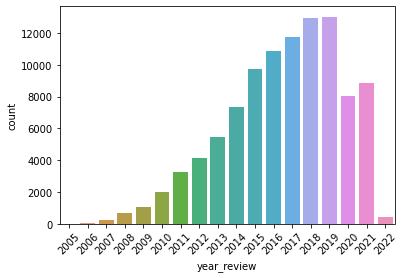

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x="year_review")
plt.xticks(rotation=45);

Pode-se perceber que o número de *reviews* é crescente, até o ano de 2019. Os anos de 2020 e 2021 possuem uma queda brusca. Como trata-se de *dataset* com *reviews* de negócios como restaurante e hotéis, é possível que essa redução seja em decorrência da pandemia do Covid-19. Já para o ano de 2022, uma hipótese é que o *dataset* foi coletado apenas até alguma parte do início do ano de 2022.

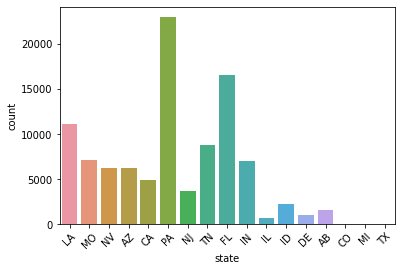

In [ ]:
sns.countplot(data=df, x="state")
plt.xticks(rotation=45);

Os estados mais frequentes no *dataset* são Pensilvânia, Flórida e Louisiana. Pensilvânia corresponde a 1 milhão de *reviews*.

In [ ]:
df['text_size'] = df['text'].apply(lambda x: len(x.split(' ')))
df.head()

,year_review,stars,text,useful,state,text_size
118,2005,3.0,A semi-successful imitation of a modern New Yo...,1,LA,13
144,2005,4.0,Good stuff. Pad C You Sen Me is always a tast...,1,MO,13
155,2005,3.0,Another Reno High favorite. Great bagel and m...,0,NV,28
167,2005,2.0,"Bad food, bitchy service. One of the worst exa...",1,LA,15
285,2005,4.0,Some of the best versions of classic New Orlea...,1,LA,36


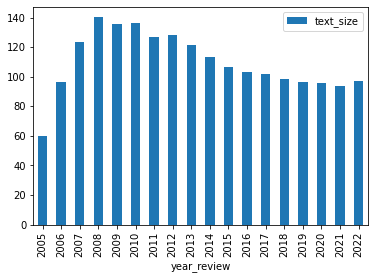

In [ ]:
df.groupby(by=['year_review']).agg({'text_size': 'mean'}).plot(kind='bar')

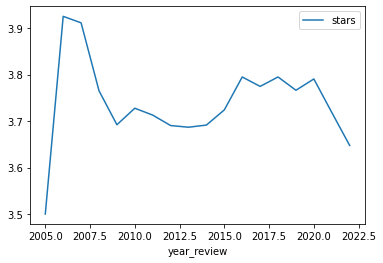

In [ ]:
df.groupby(by=['year_review']).agg({'stars': 'mean'}).plot(kind='line')

## Tratamento dos dados

Como os textos são em idioma inglês, não há a necessidade de remoção de acentos. No entanto, um tratamento a ser feito é a transformação para minúsculo, e a exclusão de números. A exclusão de números se deve ao fato de reduzir as dimensões da representação em Bag-of-Words.

In [ ]:
def remove_numbers(x):
    return ''.join(i for i in x.lower() if not i.isdigit())

In [ ]:
df['text'] = df['text'].apply(remove_numbers)

Neste trecho, a ideia era fazer um Bag-of-Words. No entanto, ao fazer a conversão para arrays do numpy usando .todense(), dava estouro de memória. Após algumas pesquisas na internet, encontrei o HashingVectorizer, que não mantém vocabulário e gera um vetor para representar o documento. Ainda, foi limitado o tamanho do vetor de representação em 300. Aqui também foram removidas as *stopwords*.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer

cv = HashingVectorizer(stop_words='english', n_features=300)
X = cv.fit_transform(df['text'].values)
Y = df['stars'].values

Aqui, foi realizada a divisão 70/30, ou seja: 70% dos dados pra treino e 30% para teste. 

Além disso, foi aplicado o PCA para reduzir a dimensionalidade dos dados, mantendo 90% da variância explicada. Com isso, as 300 dimensões geradas pelo HashingVectorizer foram reduzidas a 225. Uma redução em **25% nas dimensões.**

In [ ]:
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(X, Y, shuffle=False, test_size=.3, random_state=42)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=.9)
x_treino = pca.fit_transform(x_treino.todense())
x_teste = pca.transform(x_teste.todense())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


In [ ]:
pca.n_components_

225

## Aplicação de Aprendizado de Máquina (SVM)

Aqui foi realizado o treinamento com o SupportVectorClassifier, com os parâmetros padrão (C=1.0, kernel='rbf'). Com 100 mil dados, demorou cerca de 1h para o treino do modelo.

In [ ]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_treino, y_treino)

SVC()

O teste foi realizado com 30% dos dados. A avaliação foi feita, conforme definido no cabeçalho, com as métricas: Acurácia, F1, e Cohen's Kappa. Foi utilizada também uma matriz de confusão para visualizar os erros do classificador.

0.6438666666666667
0.6438666666666667
0.42105216042590443
              precision    recall  f1-score   support

         1.0       0.65      0.70      0.67      5633
         2.0       0.31      0.11      0.16      2033
         3.0       0.35      0.13      0.19      2185
         4.0       0.35      0.32      0.34      4308
         5.0       0.73      0.85      0.79     15841

    accuracy                           0.64     30000
   macro avg       0.48      0.42      0.43     30000
weighted avg       0.61      0.64      0.62     30000



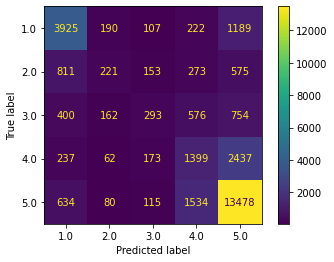

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score, classification_report, ConfusionMatrixDisplay

predictions = svc.predict(x_teste)
print("Acurácia", accuracy_score(y_teste, predictions))
print("F1", f1_score(y_teste, predictions, average="micro"))
print("Cohen's Kappa", cohen_kappa_score(y_teste, predictions))
print(classification_report(y_teste, predictions))
ConfusionMatrixDisplay.from_predictions(y_teste, predictions)

O Classificador atingiu uma **acurácia de 64%**, mesmo valor obtido para F1-score, o que não é um resultado ruim, visto a dificuldade de avaliar a subjetividade da escrita. Além disso, como se trata de uma classificação multiclasse, um classificador aleatório teria acurácia teórica de 20% apenas, considerando 5 classes.

No entanto, vemos que o índice Kappa é de apenas 42%, considerado uma concordância moderada.

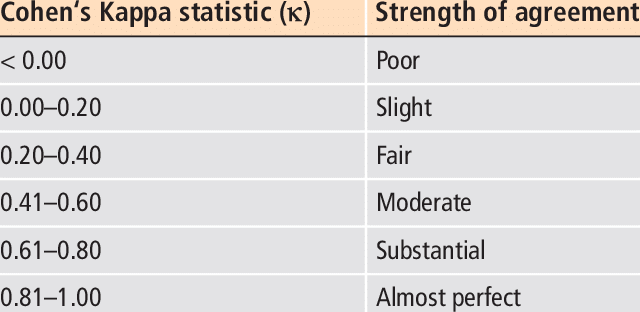

Avaliando a matrix de confusão, pode-se perceber que o classificador tende a detectar melhor os padrões que levam à nota 1 e nota 5. Ou seja, os extremos. No entando, no que tange as notas 2, 3, e 4, é uma zona cinzenta mesmo pra humanos, pois é subjetivo. Nota 1 e 2 ou entre 4 e 5 tem uma nuance pequena e subjetiva. 

Além disso, complementando a informação acima, pode ser notada uma confusão entre as notas 4 e 5, por parte do classificador.

## Aplicação de *Deep Learning*

Importando as bibliotecas

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.callbacks import EarlyStopping


Realizando o tratamento dos dados

In [ ]:
tokenizer = Tokenizer(num_words=50000, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['text'].values)
X = tokenizer.texts_to_sequences(df['text'].values)
X = pad_sequences(X, maxlen=300)

**Definindo a estrutura da rede neural**

Foi considerado uma camada de Embedding, pra converter texto em representações vetoriais, uma camada de dropout para reduzir a chance de overfitting, uma camada com 100 LSTMs, com dropout interno e externo, e uma camada de saída densa de tamanho 5, considerando o número de estrelas.

In [ ]:
model = Sequential()
model.add(Embedding(50000, 300, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Visualização da arquitetura da rede neural deep.

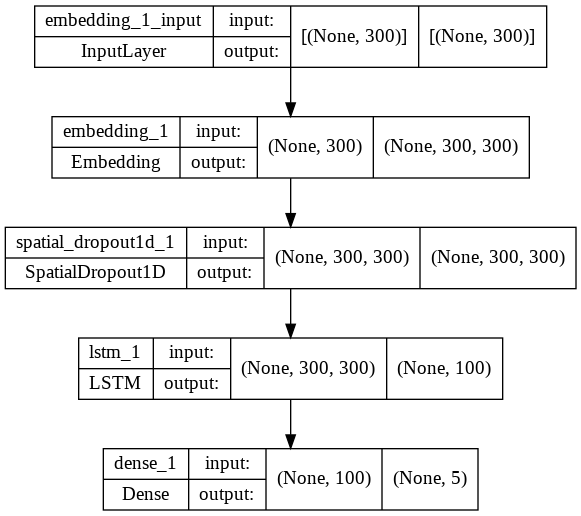

In [ ]:
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Foi realizada também a divisão em 70/30, como no SVM.

In [ ]:
Y = pd.get_dummies(df['stars']).values

In [ ]:
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(X, Y, test_size=.3, random_state=42)

Confirmação do ambiente utilizando GPU para acelerar o treinamento.

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

Treinamento da Rede Neural *deep*, definida acima.

In [ ]:
hist = model.fit(x_treino, y_treino, epochs=10, batch_size=512, validation_split=.1,
                 callbacks=[EarlyStopping(monitor='val_loss', patience=3)])

Epoch 1/10
124/124 [==============================] - 139s 1s/step - loss: 0.4399 - accuracy: 0.8327 - val_loss: 1.0683 - val_accuracy: 0.6126
Epoch 2/10
124/124 [==============================] - 139s 1s/step - loss: 0.3754 - accuracy: 0.8588 - val_loss: 1.0794 - val_accuracy: 0.6249
Epoch 3/10
124/124 [==============================] - 139s 1s/step - loss: 0.3335 - accuracy: 0.8768 - val_loss: 1.1562 - val_accuracy: 0.6223
Epoch 4/10
124/124 [==============================] - 138s 1s/step - loss: 0.2959 - accuracy: 0.8938 - val_loss: 1.3042 - val_accuracy: 0.6309


Realizando o teste.

In [ ]:
import numpy as np

padded = pad_sequences(x_teste, maxlen=300)
pred = model.predict(padded)
print(pred, np.argmax(pred, axis=1))

[[1.02970034e-05 5.51871017e-06 1.81146563e-04 4.04499806e-02
  9.59353030e-01]
 [7.99662230e-05 1.12937276e-04 7.10840756e-03 2.45027646e-01
  7.47671068e-01]
 [2.65603159e-02 6.43810555e-02 4.42531466e-01 4.23103452e-01
  4.34236750e-02]
 ...
 [7.44566381e-01 1.90893948e-01 3.44856828e-02 1.04619358e-02
  1.95920672e-02]
 [3.45703029e-06 8.65394043e-07 1.70334406e-05 3.62995616e-03
  9.96348619e-01]
 [2.00228969e-05 1.32421104e-04 4.34673298e-03 9.70515132e-01
  2.49855835e-02]] [4 4 2 ... 0 4 3]


Avaliação em termos de Accuracy, F1, e Cohen's Kappa.

Acurácia 0.6419333333333334
F1 0.6419333333333334
Cohen's Kappa 0.4853405181155547
              precision    recall  f1-score   support

           1       0.69      0.82      0.75      4523
           2       0.37      0.28      0.32      2387
           3       0.40      0.37      0.38      2987
           4       0.45      0.40      0.43      6164
           5       0.78      0.81      0.79     13939

    accuracy                           0.64     30000
   macro avg       0.54      0.54      0.53     30000
weighted avg       0.63      0.64      0.63     30000



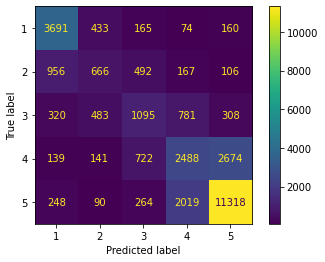

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score, classification_report, ConfusionMatrixDisplay

y_test = np.argmax(y_teste, axis=1) + 1
y_pred = np.argmax(pred, axis=1) + 1

print("Acurácia", accuracy_score(y_test, y_pred))
print("F1", f1_score(y_test, y_pred, average="micro"))
print("Cohen's Kappa", cohen_kappa_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

Analisando os resultados obtidos pela Rede Neural *deep*, a acurácia e o *F1-score* obtida foi muito próxima à obtida pelo SVM. No entanto, o Cohen's Kappa é ligeiramente maior, acusando uma maior concordância da rede neural.

Pode ser ainda percebido a confusão entre notas 4 e 5 por parte do classificador. 

## Conclusão

É possível o uso de SVM e Redes Neurais *deep* para classificação de textos. Nos testes realizados neste trabalho, SVM e Redes Neurais alcançaram acurácia de 64%. Embora a acurácia e o F1 de ambos tenha sido comparável, por se tratar de uma classificação multiclasse, foi utilizado também o Cohen's Kappa. O Cohen's Kappa da Rede Neural foi ligeiramente superior (48 a 42, quase 9% superior), indicando uma maior concordância na rede neural.

Ainda, embora não registrado no notebook, o tempo realizado para treinamento do SVM beirou 1 hora, enquanto a rede neural, com auxílio de GPU, realizou o treinamento em cerca de 20 minutos. Esse valor mostra o benefício do uso de GPU e ainda, que a rede neural tem um melhor custo-benefício, quando utilizando GPU, e ainda em termos de performance de classificação.